In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

# Task 1: Draw test points on left image

[[338 197   1]
 [468 290   1]
 [253 170   1]
 [263 256   1]
 [242 136   1]]


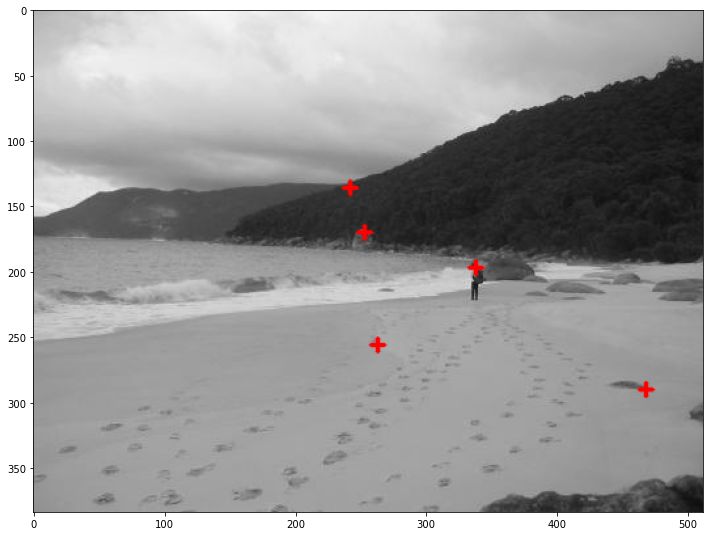

In [2]:
# Show results below:
img_L = cv2.imread('left.jpg')
coord = np.array([[338,197,1],[468,290,1],[253,170,1],[263,256,1],[242,136,1]])
print(coord)

for i in range(len(coord)):
    h, w = coord[i][0], coord[i][1]
    cv2.drawMarker(img_L, (h,w),(255,0,0),markerType=cv2.MARKER_CROSS
    ,markerSize=10, thickness=2, line_type=cv2.LINE_AA)

figure(figsize=(12,10))
plt.imshow(img_L) 
# Demonstrate your understanding by answering the question below.
# What makes a coordinate homogenous?

# A homogenenous coordinate is a coordinate system that algebraically treats all points in the projective plane 
# equally. A coordinate is homogenous if x=ax where a ~= 0 and it can be used to represent points at infinity 
# with a finite coordinates. For example if we have a matrix x = [5 10] in euclidean plane and the homogenous 
# coordinate of this is x = [5 10 1], so we add another dimension in our matrix. The points at infinity of our matrix 
# will be equal to x = [5 10 0], this is a point at infinity because with this matrix if we want to go back to 
# the euclidean coordinate, we would divide this with the last element which is zero and any value divided by zero
# is equal to infinity


# Task 2: Use homography to find right image points

[[142.66555052 211.77073075   1.        ]
 [261.83873366 298.43101419   1.        ]
 [ 56.03915004 184.68092375   1.        ]
 [ 64.90473276 274.29144567   1.        ]
 [ 44.93983103 148.90246583   1.        ]]


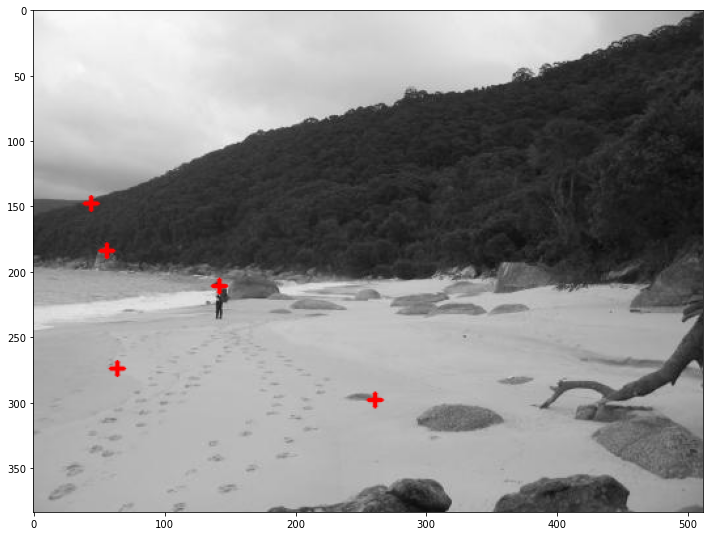

In [3]:
# Show results below:
img_R = cv2.imread('right.jpg')

H = np.array([[1.6010, -0.0300, -317.9341], [0.1279, 1.5325, -22.5847], [0.0007, 0, 1.2865]])
xr = np.dot(H, np.transpose(coord))
xr = np.transpose(xr)

for i in range(len(xr)):
    xr[i][0] = xr[i][0] / xr[i][2]
    xr[i][1] = xr[i][1] / xr[i][2]
    xr[i][2] = xr[i][2] / xr[i][2]


for i in range(len(xr)):
    
    h, w = int(xr[i][0]), int(xr[i][1])
    cv2.drawMarker(img_R, (h,w),(255,0,0),markerType=cv2.MARKER_CROSS
    ,markerSize=10, thickness=2, line_type=cv2.LINE_AA)

print(xr)

figure(figsize=(12,10))
plt.imshow(img_R) 

# Demonstrate your understanding by answering the question below.
# How do you reverse a homography operation?


# Task 3: Billinear interpolation to the right image

In [4]:
def interp(im,x,y): # a function to interpolate the image pixel value at coordinates x,y
    x1 = int(np.floor(x))
    x2 = int(np.ceil(x))
    y1 = int(np.floor(y))
    y2 = int(np.ceil(y)) 
    Q11 = im[x1,y1,0]
    Q12 = im[x1,y2,0]
    Q21 = im[x2,y1,0]
    Q22 = im[x2,y2,0]
    # x-direction
    R1 = Q11 * ((x2-x)/(x2-x1)) + Q21 * ((x-x1)/(x2-x1))
    R2 = Q12 * ((x2-x)/(x2-x1)) + Q22 * ((x-x1)/(x2-x1))
    # y-direction
    result = R1 * ((y2-y)/(y2-y1)) + R2 * ((y-y1)/(y2-y1))
    
    return result

# Print test results for test points below
img_L = cv2.imread('left.jpg')
img_R = cv2.imread('right.jpg')

test_points = []

for i in range(len(xr)):
    test_points.append(interp(img_R, xr[i][1], xr[i][0]))

print(test_points)
# Demonstrate your understanding by answering the question below.
# Explain why we need bilinear interpolation?


[118.52244596111441, 180.0533033498499, 83.51462546797471, 186.41710866313065, 49.87780754172684]


# Task 4: Image Stitching

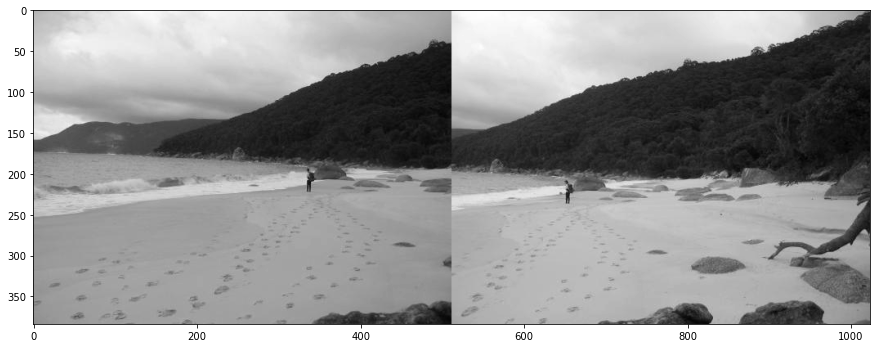

In [23]:
## Add your code below (use the interp function above)
img_L = cv2.imread('left.jpg')
img_R = cv2.imread('right.jpg')

final_img =  np.zeros((384,1024))

for i in range(len(final_img)):
    k = 0
    for j in range(len(final_img[i])):
        if j < 512:
            final_img[i,j] = img_L[i,j,0]
        else:
            final_img[i,j] = img_R[i,k,0]
            k += 1

figure(figsize = (15,10))
plt.imshow(final_img, cmap='gray')  
            
## Show results below:

# Demonstrate your understanding by answering the question below.
# Why is there an obvious stitch in the image?


# Task 5: Better blending

In [ ]:
## Add your code below (use the interp function above)


### Explain your code and the approach you took:
#
#
#
#


## Show results below:
